In [2]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.

This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 12 clinical features.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


In [ ]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
)
data_np = np.array(data)
A = (
    data_np[:, :-1].astype(np.float64).T
)  # matrix containing the data (num features x num patients)
labels = data_np[:, -1].astype(np.int32)  # outcomes (0 = alive; 1 = death)

How many patients are associated with good and with bad outcome, respectively?


In [8]:
alive_count = np.sum(labels == 0)
death_count = np.sum(labels == 1)

print(f"Number of patients alive (good outcome): {alive_count}")
print(f"Number of patients dead (bad outcome): {death_count}")

Number of patients alive (good outcome): 203
Number of patients dead (bad outcome): 96


Perform PCA on the dataset by means of the SVD decomposition.

Then, plot the trend of the following quantities and comment the results: Singular values, cumulate fraction of singular values, the fraction of the "explained variance".


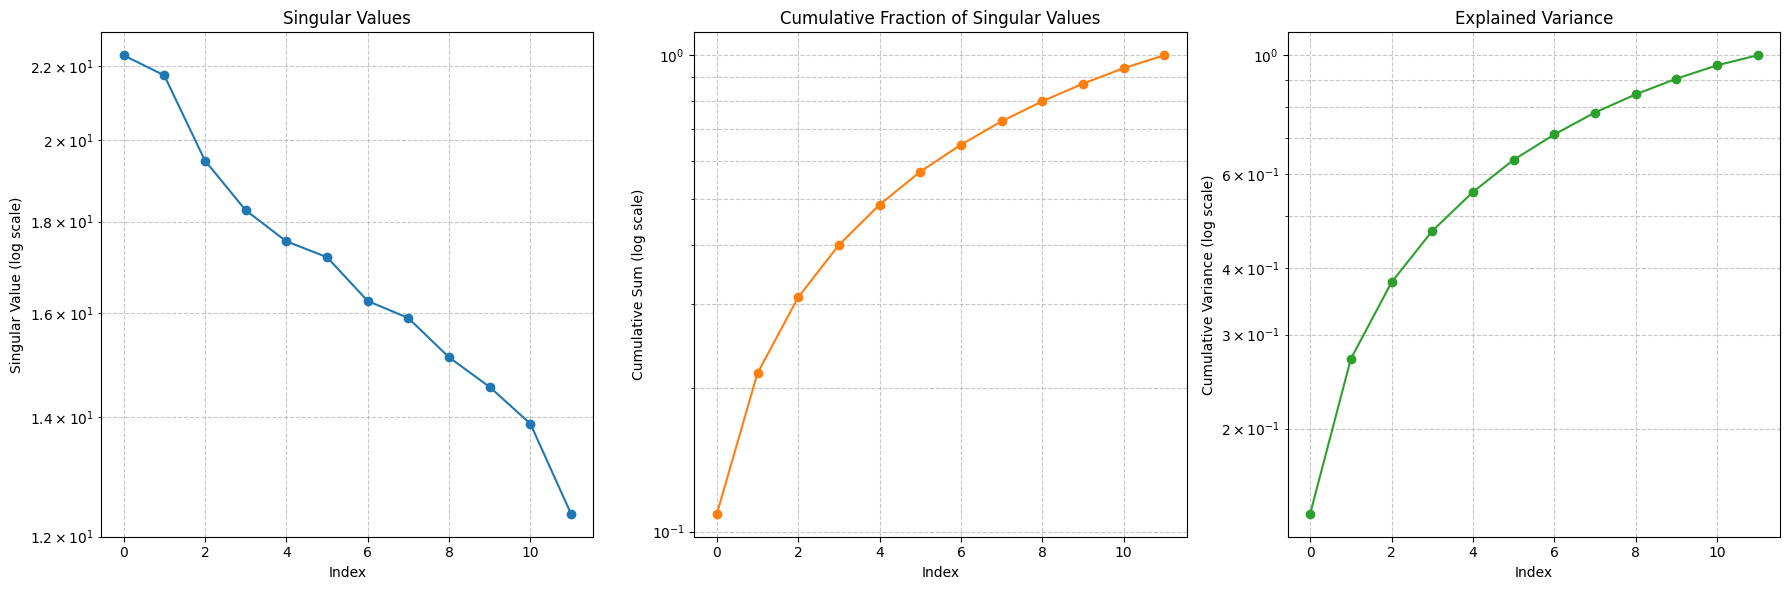

In [13]:
A_mean = np.mean(A, axis=1)
A_std = np.std(A, axis=1)
A_standardized = (A - A_mean[:, None]) / A_std[
    :, None
]  # Perform standardization in order to have zero mean and unit variance

U, s, VT = np.linalg.svd(A_standardized, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Singular values plot
axs[0].semilogy(s, "o-", color="tab:blue")
axs[0].set_title("Singular Values")
axs[0].set_xlabel("Index")
axs[0].set_ylabel("Singular Value (log scale)")
axs[0].grid(True, which="both", linestyle="--", alpha=0.7)

# Cumulative fraction of singular values
cumulative_fraction = np.cumsum(s) / np.sum(s)
axs[1].semilogy(cumulative_fraction, "o-", color="tab:orange")
axs[1].set_title("Cumulative Fraction of Singular Values")
axs[1].set_xlabel("Index")
axs[1].set_ylabel("Cumulative Sum (log scale)")
axs[1].grid(True, which="both", linestyle="--", alpha=0.7)

# Explained variance (from squared singular values)
explained_variance = np.cumsum(s**2) / np.sum(s**2)
axs[2].semilogy(explained_variance, "o-", color="tab:green")
axs[2].set_title("Explained Variance")
axs[2].set_xlabel("Index")
axs[2].set_ylabel("Cumulative Variance (log scale)")
axs[2].grid(True, which="both", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Generate a scatterplot of the first two principal components of the dataset, grouped by label;


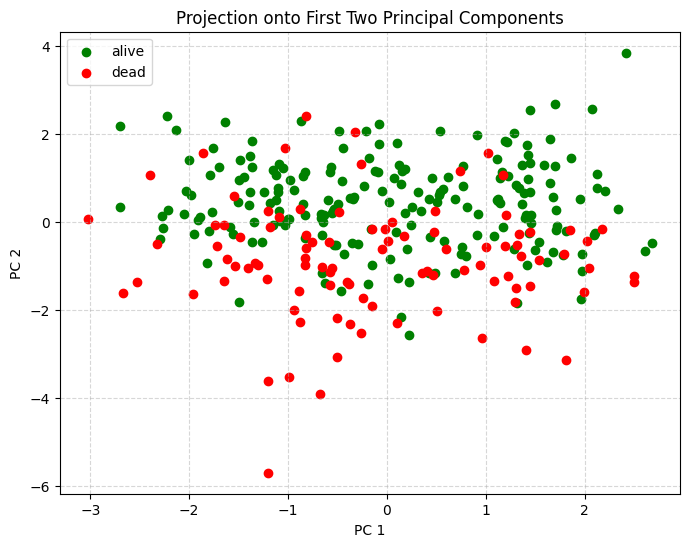

In [17]:
principal_components = U.T @ A_standardized
pc_1 = principal_components[0, :]
pc_2 = principal_components[1, :]

plt.figure(figsize=(8, 6))
plt.scatter(pc_1[labels == 0], pc_2[labels == 0], color="g", label="alive")
plt.scatter(pc_1[labels == 1], pc_2[labels == 1], color="r", label="dead")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.title("Projection onto First Two Principal Components")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Which one of the first two principal components correlates most with the outcome?


By standardizing the input we can observe thast the second principal componet is the one most related to the output.


Is a bad outcome associated with a positive or negative value of the principal component you chose at previous point?


Bad outcome is related to negative value of the second principal component.


Propone a risk predictor based on the sign of the principal component you chose-


We can use a threshold on -0.5


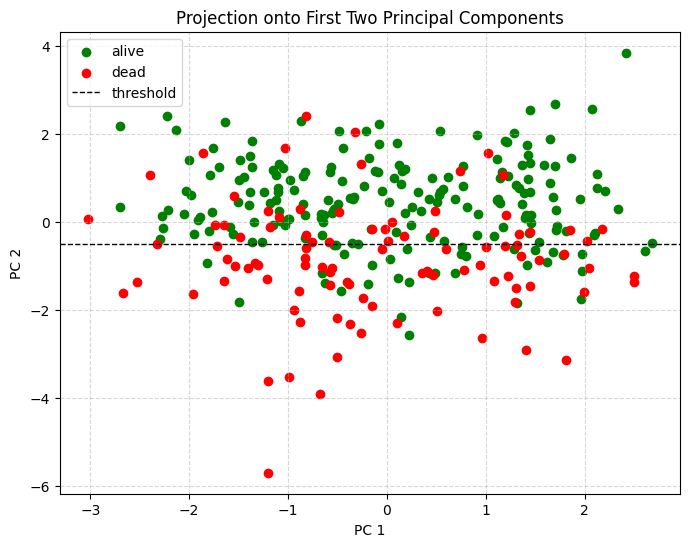

In [22]:
principal_components = U.T @ A_standardized
pc_1 = principal_components[0, :]
pc_2 = principal_components[1, :]

plt.figure(figsize=(8, 6))
plt.scatter(pc_1[labels == 0], pc_2[labels == 0], color="g", label="alive")
plt.scatter(pc_1[labels == 1], pc_2[labels == 1], color="r", label="dead")
plt.axhline(
    -0.5, color="black", linestyle="--", linewidth=1, label="threshold"
)  # Horizontal line at y=0
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.title("Projection onto First Two Principal Components")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Based on the risk predictor, compute the number of true positives (TP), false positives
(FP), true negatives (TN) and false negatives (FN).


In [24]:
# Risk prediction: if pc_2 < 0, predict death (label 1)
predicted_labels = (pc_2 < -0.5).astype(int)

# True labels
true_labels = labels

# Confusion matrix components
TP = np.sum((predicted_labels == 1) & (true_labels == 1))  # True Positives
FP = np.sum((predicted_labels == 1) & (true_labels == 0))  # False Positives
TN = np.sum((predicted_labels == 0) & (true_labels == 0))  # True Negatives
FN = np.sum((predicted_labels == 0) & (true_labels == 1))  # False Negatives

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 61
False Positives (FP): 33
True Negatives (TN): 170
False Negatives (FN): 35


Compute the following quantities:

- sensitivity: (TP)/(TP + FN);
- specificity: (TN)/(TN + FP);
- accuracy: (TP + TN)/(TP + TN + FP + FN).


In [25]:
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Sensitivity (Recall): 0.6354
Specificity: 0.8374
Accuracy: 0.7726


# Exercise 2


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import jax
import jax.numpy as jnp

Consider the Rosenbrock function

$$
f(x,y)  =100(y-x^2)^2+(1-x)^2
$$


In [ ]:
def f(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

Compute the gradient $\nabla f$ and the Hessian of f. Prove that the function has a unique minimizer $x^*$ and compute it.


Gradient $ \nabla f(x, y) $

We compute partial derivatives:

- $ \frac{\partial f}{\partial x} = -400x(y - x^2) + 2(x - 1) $
- $ \frac{\partial f}{\partial y} = 200(y - x^2) $

So the gradient is:

$$
\nabla f(x, y) =
\begin{bmatrix}
-400x(y - x^2) + 2(x - 1) \\
200(y - x^2)
\end{bmatrix}
$$

Hessian $ \nabla^2 f(x, y) $

Second-order partial derivatives:

- $ \frac{\partial^2 f}{\partial x^2} = -400(y - x^2) + 800x^2 + 2 $
- $ \frac{\partial^2 f}{\partial x \partial y} = \frac{\partial^2 f}{\partial y \partial x} = -400x $
- $ \frac{\partial^2 f}{\partial y^2} = 200 $

The Hessian matrix is:

$$
\nabla^2 f(x, y) =
\begin{bmatrix}
-400(y - x^2) + 800x^2 + 2 & -400x \\
-400x & 200
\end{bmatrix}
$$

Critical Point and Minimizer

Set $ \nabla f(x, y) = 0 $:

From $ \frac{\partial f}{\partial y} = 0 $:  
$ y = x^2 $

Substitute into $ \frac{\partial f}{\partial x} = 0 $:

$$
-400x(0) + 2(x - 1) = 0 \Rightarrow x = 1 \Rightarrow y = 1
$$

So, the **unique critical point** is:

$$
x^* = (1, 1)
$$

Verify Minimizer via Hessian

Evaluate the Hessian at $ (1, 1) $:

$$
\nabla^2 f(1, 1) =
\begin{bmatrix}
802 & -400 \\
-400 & 200
\end{bmatrix}
$$

Check positive definiteness:

- First leading principal minor: $ 802 > 0 $
- Determinant: $ 802 \cdot 200 - (-400)^2 = 400 > 0 $

The Hessian is **positive definite**, so $ (1, 1) $ is a **local minimum**, and because it's the only critical point, it's the **global minimizer**.


Apply the Gradient Descent method with fixed learning rate ($\eta$) to find the minimum of f. Explore the effect of different values of $\eta$ and different starting points. Comment on the results.


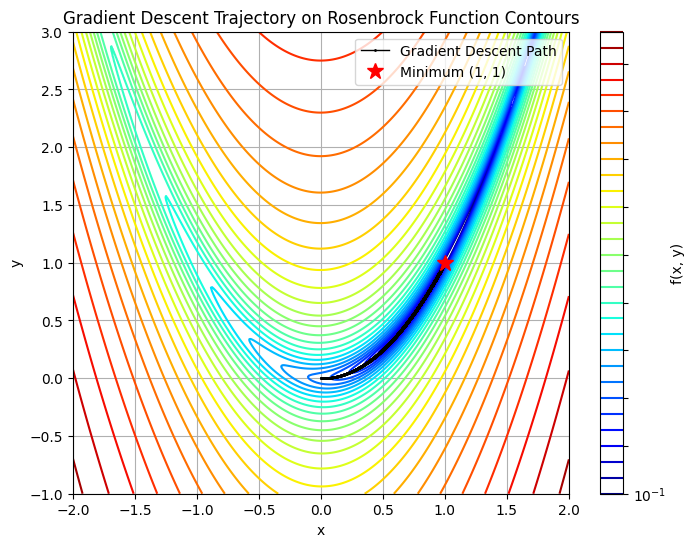

In [ ]:
f_grad = jax.jit(jax.grad(f))


def gradient_descent(start, eta, max_iter=10000, tol=1e-6):
    path = [np.array(start)]
    x = jnp.array(start, dtype=jnp.float32)

    for _ in range(max_iter):
        grad = f_grad(x)
        x_new = x - eta * grad
        path.append(np.array(x_new))
        if jnp.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return np.array(path)


# Run gradient descent from (0, 0) with learning rate 1e-3
trajectory = gradient_descent(start=[0.0, 0.0], eta=1e-3)

# Prepare grid for contour plot
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 100 * (Y - X**2) ** 2 + (1 - X) ** 2

# Plot contour + trajectory
plt.figure(figsize=(8, 6))
levels = np.logspace(-1, 3.5, 30)  # log-spaced contour levels for better visualization
cp = plt.contour(X, Y, Z, levels=levels, norm=LogNorm(), cmap="jet")
plt.colorbar(cp, label="f(x, y)")

# Plot trajectory points and line connecting them
plt.plot(
    trajectory[:, 0],
    trajectory[:, 1],
    "o-",
    color="black",
    markersize=1,
    linewidth=1,
    label="Gradient Descent Path",
)

# Mark the known minimum
plt.plot(1, 1, "r*", markersize=12, label="Minimum (1, 1)")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent Trajectory on Rosenbrock Function Contours")
plt.legend()
plt.grid(True)
plt.show()

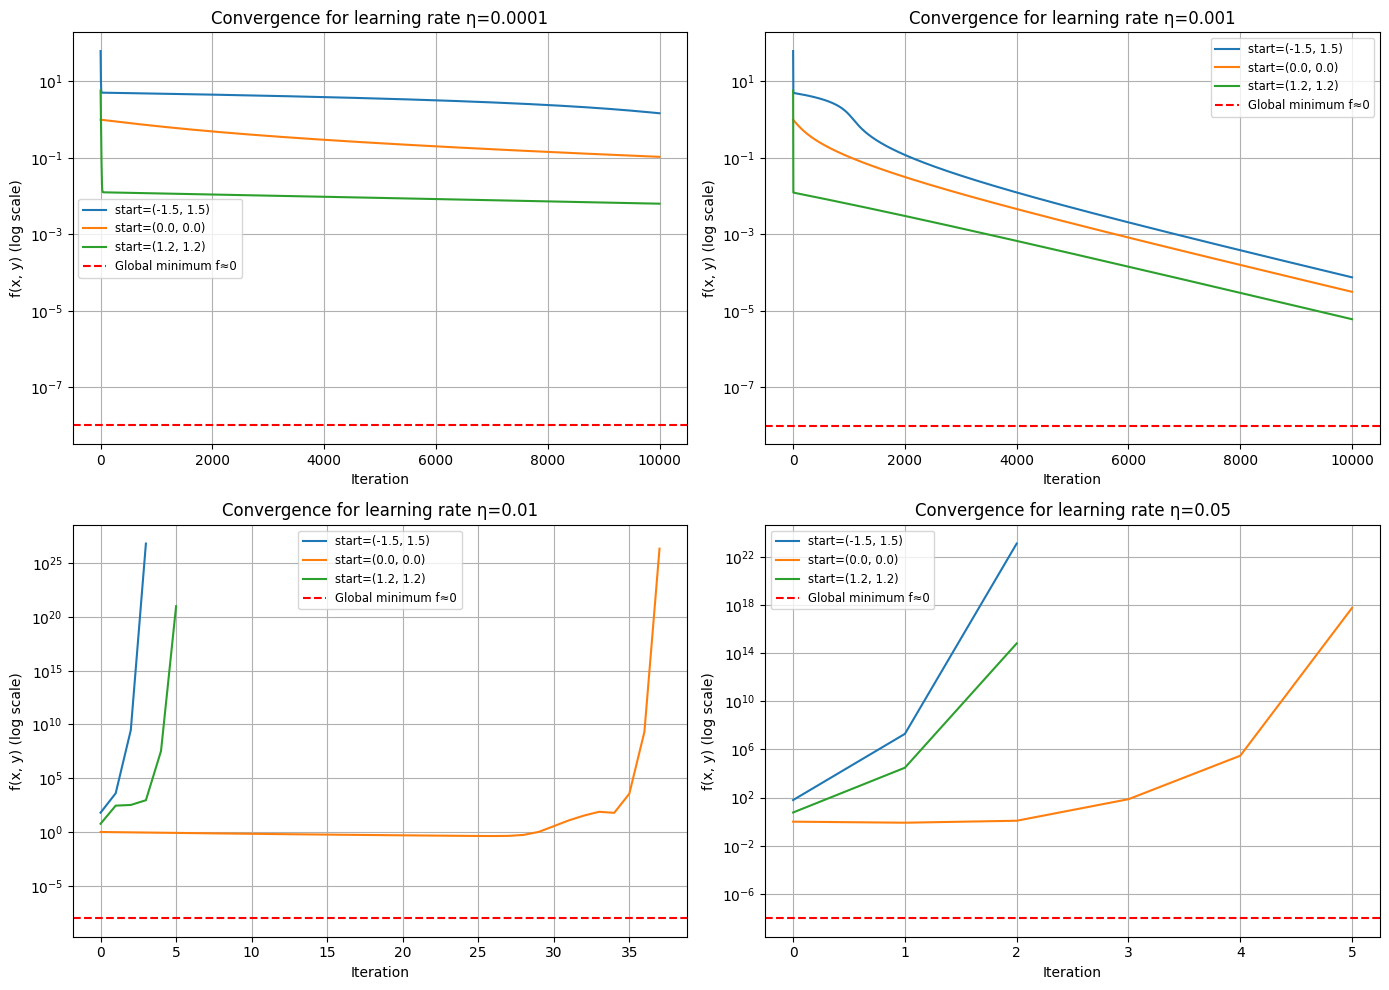

In [ ]:
f_grad = jax.jit(jax.grad(f))


def gradient_descent(start, eta, max_iter=10000, tol=1e-6):
    path = [np.array(start)]
    values = [f(jnp.array(start, dtype=jnp.float32))]
    x = jnp.array(start, dtype=jnp.float32)

    for _ in range(max_iter):
        grad = f_grad(x)
        x_new = x - eta * grad
        path.append(np.array(x_new))
        values.append(f(x_new))
        if jnp.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(path), np.array(values)


# Parameters
etas = [1e-4, 1e-3, 1e-2, 5e-2]
starts = [(-1.5, 1.5), (0.0, 0.0), (1.2, 1.2)]
start_colors = {
    "(-1.5, 1.5)": "tab:blue",
    "(0.0, 0.0)": "tab:orange",
    "(1.2, 1.2)": "tab:green",
}

max_iter_to_show = 10000

plt.figure(figsize=(14, 10))

for idx, eta in enumerate(etas, 1):
    plt.subplot(2, 2, idx)
    for start in starts:
        _, values = gradient_descent(start, eta, max_iter=max_iter_to_show)
        label = f"start={start}"
        color = start_colors[str(start)]
        plt.plot(values, label=label, color=color)

    plt.axhline(1e-8, color="red", linestyle="--", label="Global minimum f≈0")
    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("f(x, y) (log scale)")
    plt.title(f"Convergence for learning rate η={eta}")
    plt.legend(fontsize="small")
    plt.grid(True)

plt.tight_layout()
plt.show()


Effect of learning rate:

- Small learning rates: Convergence is very slow, but stable. The path smoothly descends into the valley.

- Moderate learning rates: these give a good balance; faster convergence and stable trajectories that closely follow the curved valley to the minimum.

- Large learning rate: Often unstable. Trajectories may oscillate wildly or diverge because steps overshoot the narrow curved valley in Rosenbrock's function.

Effect of starting points:

- Starting closer to the minimum (e.g., (1.2, 1.2)) helps faster convergence.

- Starting far away or off the valley (e.g., (-1.5, 1.5)) results in a longer path and sometimes requires more iterations.

The Rosenbrock function is notorious for its curved banana-shaped valley, so starting points off this valley require careful step sizes.
